# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

<a id='intro'></a>
## Introduction

### Dataset Description 


|   Columns | description |
|:-------------:|-------------:|
|   Gender | Male:M, Female:F|
|   ScheduledDay | The day patient registed.|
|   AppointmentDay | The Doctor's appointment day.|
|   Age | The patient age.|
|   Neighbourhood | The nearest district to the patient.|
|   Scholarship | If the patient has health insurance (True or False)|
|   Hypertension| If the patient has abnormally high blood pressure (True or False)|
|   Diabetes | If the patient has diabetes (True or False)|
|   Alcoholism | If the patient is addicted to alcohol (True or False)|
|   Handcap  | If the patient is disabled (True or False)|
|   SMS_received  | If the patient receives the message.|
|   No-show  | If the patient came  (Yes = Missed; No = Attended)|

### Question(s) for Analysis

1- Do diseases and disabilities affect attendance?

2- Does age affect attendance?

3 - Does the time difference between the date of registration and the date of attendance affect?


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Observations:
1- The data has 110527 rows and 14 columns .

2 - There is no missing values the count of entries for each column equal to range entries .

3 - There some columns use more memory .

4 - Column {No-show} dependent on {Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received} and they are independent .

5 - There is no duplicated data .

6 - Handcap column has data other 0 and 1.

7 - Threre some patient show multiple time


### Data Cleaning
 

In [11]:
# Deleteing the PatientId - AppointmentID 
df.drop(columns=['PatientId', 'AppointmentID'], axis = 1, inplace=True)
# Checking ...
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [12]:
# Changing the names of columns to snake case and lower case letters
df.columns = ['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [13]:
# changing type of scheduled_day   appointment_day
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
# Checking ...
df['scheduled_day'].dtype

datetime64[ns, UTC]

C:\Users\A-Dev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


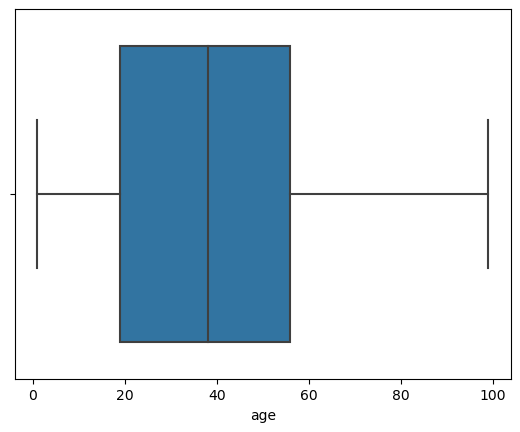

In [14]:
# Cleaning outliers of columns 'age'
df = df[(df['age'] < 100) & (df['age'] > 0)]
# Ploting a box blot to check if there is outliers
sns.boxplot(df.age)
plt.show()

> As we can see there is no outliers in age column

In [15]:
# Changing the format of no show 
df['no_show'] = df['no_show'].map({'Yes':'0', 'No':'1'})
# Checking ...
df.head(3)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1


In [16]:
# Get the wating time between appoinment day and scheduled day
df['waiting_time'] = df['appointment_day'] - df['scheduled_day']
df['waiting_time'] = df['waiting_time'].dt.days
df['waiting_time'].describe()

count    106976.000000
mean          9.166794
std          15.263781
min          -7.000000
25%          -1.000000
50%           3.000000
75%          13.000000
max         178.000000
Name: waiting_time, dtype: float64

In [17]:
# Cleaning the waiting time column
df = df[df['waiting_time'] >= 0]
df['waiting_time'].describe()

count    69819.000000
mean        14.577608
std         16.513187
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: waiting_time, dtype: float64

In [18]:
# Clean handicap column
df['handicap'] = df['handicap'].apply(lambda x: 1 if x > 0 else 0)
# Checking ...
df.handicap.unique()

array([0, 1], dtype=int64)

In [19]:
# Group the age by groups to make it easy. 
# 0-18 children
# 18-35 young
# 35-60 middle
# 60-100 old
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['children', 'young', 'middle', 'old'])

In [20]:
df.head(3)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,age_group
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1,1,old
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,1,young
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0,1,middle


<a id='eda'></a>
## Exploratory Data Analysis

In [37]:
# Useful function 
def par_plot(df, col):
    ''' Function to get Proportion Between a factor and no_show
    args:
        df(DataFrame) : dataframe of the data
        col(str): column name
    
    Apply Bivariate Data
    '''
    
    proprotion = df.groupby(col)['no_show'].value_counts(normalize=True).unstack()
    print(proprotion)
    proprotion.plot(kind='bar', stacked=True)
    plt.title(f'The Proportion of {col.title()} that did not show up for their appointment')
    x = f'({col.title()}, No_show)'
    plt.xlabel(x)
    plt.ylabel('Proportion')
    plt.show()
    
def count_plot(df , col):
    '''Function tho get the counting of column
    
    args:
        df(DataFrame) : dataframe of the data
        col(str): column name
    
    Apply Univariate Data
    '''
    sns.countplot(x = col, data = df)
    plt.title(f"Proportion of Patients by {col.title()}")
    plt.xlabel(f"{col.title()}")
    plt.ylabel("Number of Patients")
    plt.show()

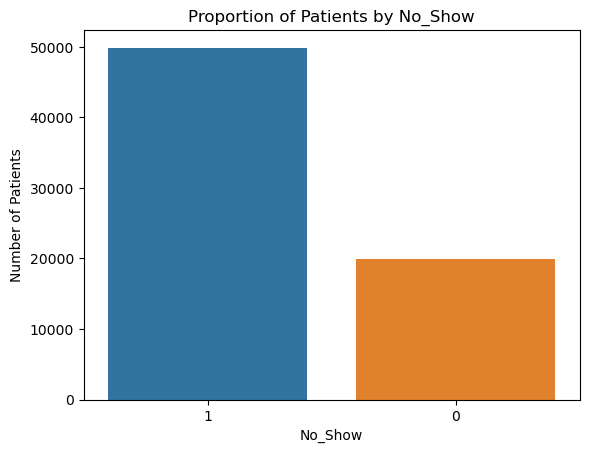

In [22]:
count_plot(df, 'no_show')

# Q1 (Do diseases and disabilities affect attendance?)

# Hipertension

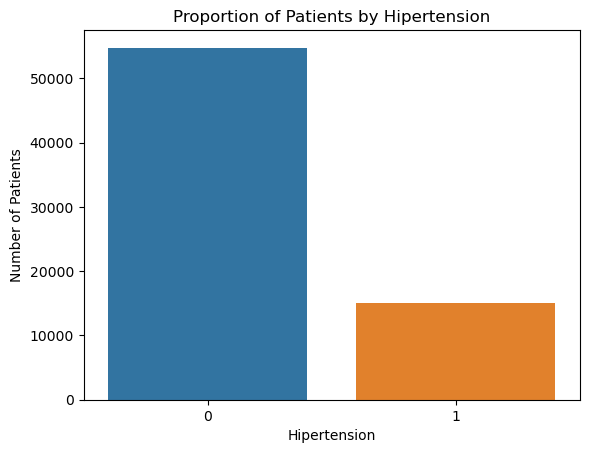

In [23]:
# get the porportion of the hipertension 
count_plot(df , 'hipertension')

no_show              0         1
hipertension                    
0             0.299244  0.700756
1             0.235247  0.764753


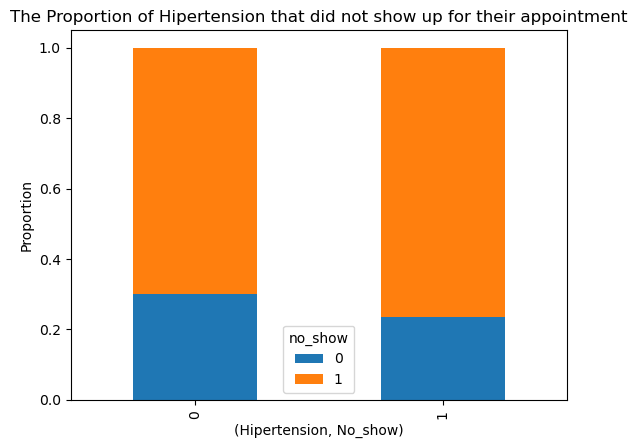

In [24]:
# Does hipertension effect no show ? 
par_plot(df , 'hipertension')

#  Observations:

1- Patients who do not have high blood pressure are much more than patients who do

2 - Patients who do not have high blood pressure attended more than those who do not have

> Thus, having a hipertension does not effect no_show

# Diabetes

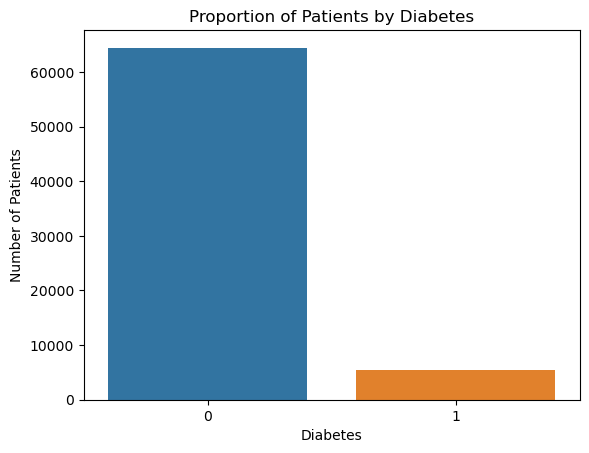

In [25]:
# get the porportion of the Diabetes 
count_plot(df , 'diabetes')

no_show          0         1
diabetes                    
0         0.288461  0.711539
1         0.249582  0.750418


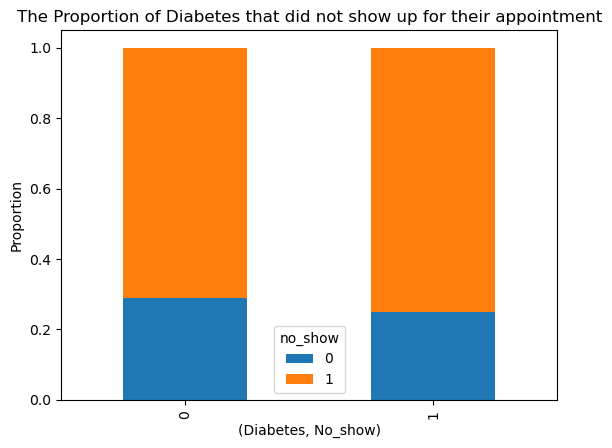

In [26]:
# Does Diabetes effect no show ?
par_plot(df , 'diabetes')

#  Observations:

1- The number of diabetics is less than those without diabetes

2 - Approximate ratio between those who have diabetes and those who do not have in terms of attendance

> Thus, having a diabetes does not effect no_show

# Alcoholism

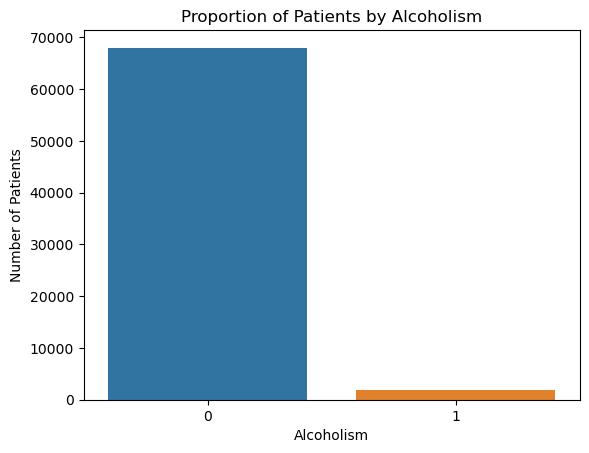

In [27]:
# get the porportion of the alcoholism 
count_plot(df , 'alcoholism')

no_show            0         1
alcoholism                    
0           0.283983  0.716017
1           0.340834  0.659166


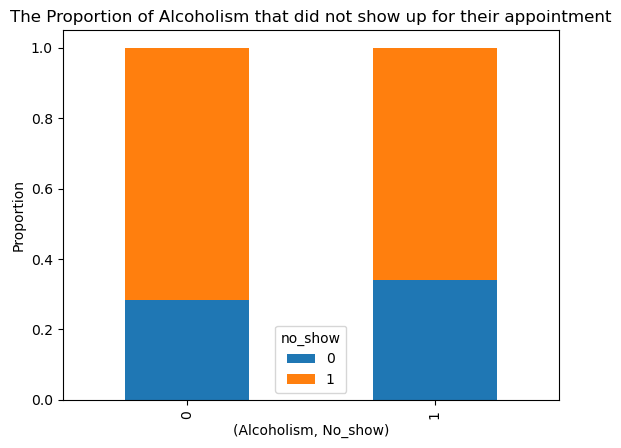

In [28]:
# Does alcoholism effect no show ?
par_plot(df , 'alcoholism')

#  Observations:

1- The number of people with alcoholism is less than those without alcoholism

2 - Approximate ratio between those who have alcoholism and those who do not have in terms of attendance

> Thus, having a alcoholism does not effect no_show

# Handicap

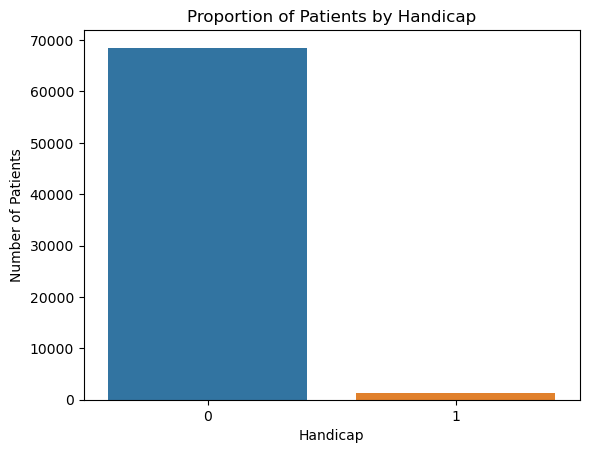

In [29]:
# get the porportion of the handicap 
count_plot(df , 'handicap')

no_show          0         1
handicap                    
0         0.286060  0.713940
1         0.254224  0.745776


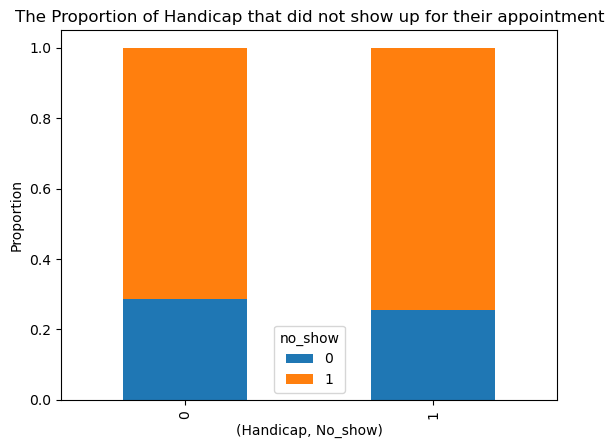

In [30]:
# Does handicap effect no show ?
par_plot(df , 'handicap')

#  Observations:

1- The number of people with handicap is less than those without handicap

2 - Approximate ratio between those who have handicap and those who do not have in terms of attendance

> Thus, having a handicap does not effect no_show

# Q2 (Does age affect attendance?)

In [31]:
# 0-18 children
# 18-35 young
# 35-60 middle
# 60-100 old

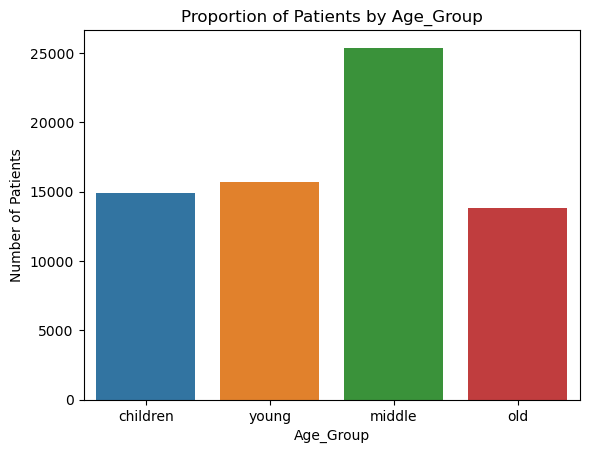

In [32]:
count_plot(df , 'age_group')

no_show           0         1
age_group                    
children   0.332059  0.667941
young      0.342251  0.657749
middle     0.267100  0.732900
old        0.204539  0.795461


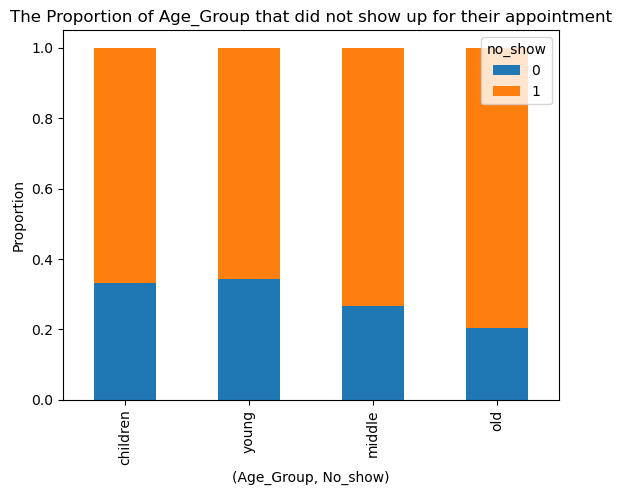

In [33]:
par_plot(df, 'age_group')

# Observation:

1 - Most of the patients in dataset were middle old (35-60)

2 - Most of the patients who attended were children (0-18) and young (35-60)

> Thus, The age does not affect the attendance, because the highest category in the data is middle, and the highest category of those who attended are children and youth

# Q2 (Does the time difference between the date of registration and the date of attendance affect?)


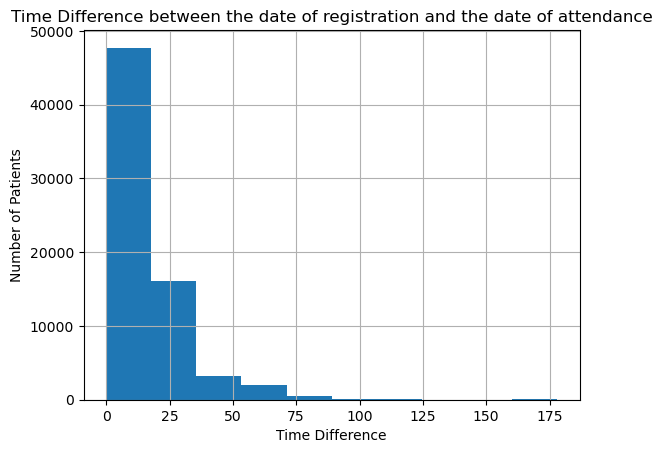

In [34]:
df['waiting_time'].hist()
plt.title('Time Difference between the date of registration and the date of attendance')
plt.xlabel('Time Difference')
plt.ylabel('Number of Patients')
plt.show()

# Observation:

1- Most of the time differences range from 0 to less than 25 days

> Thus, the waiting days does not effect no_show

<a id='conclusions'></a>
## Conclusions

In [38]:
# Get the correlation between all factors
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,waiting_time
age,1.000000,-0.122940,0.498666,0.282968,0.075547,0.079372,-0.052845,-0.002031
scholarship,-0.122940,1.000000,-0.032343,-0.027952,0.029276,-0.011149,0.019825,-0.025378
hipertension,0.498666,-0.032343,1.000000,0.423398,0.083663,0.088276,-0.040160,-0.050007
diabetes,0.282968,-0.027952,0.423398,1.000000,0.022807,0.062636,-0.033024,-0.047858
alcoholism,0.075547,0.029276,0.083663,0.022807,1.000000,0.010641,-0.009969,-0.028919
handicap,0.079372,-0.011149,0.088276,0.062636,0.010641,1.000000,-0.023063,-0.015940
sms_received,-0.052845,0.019825,-0.040160,-0.033024,-0.009969,-0.023063,1.000000,0.200680
waiting_time,-0.002031,-0.025378,-0.050007,-0.047858,-0.028919,-0.015940,0.200680,1.000000


<AxesSubplot:>

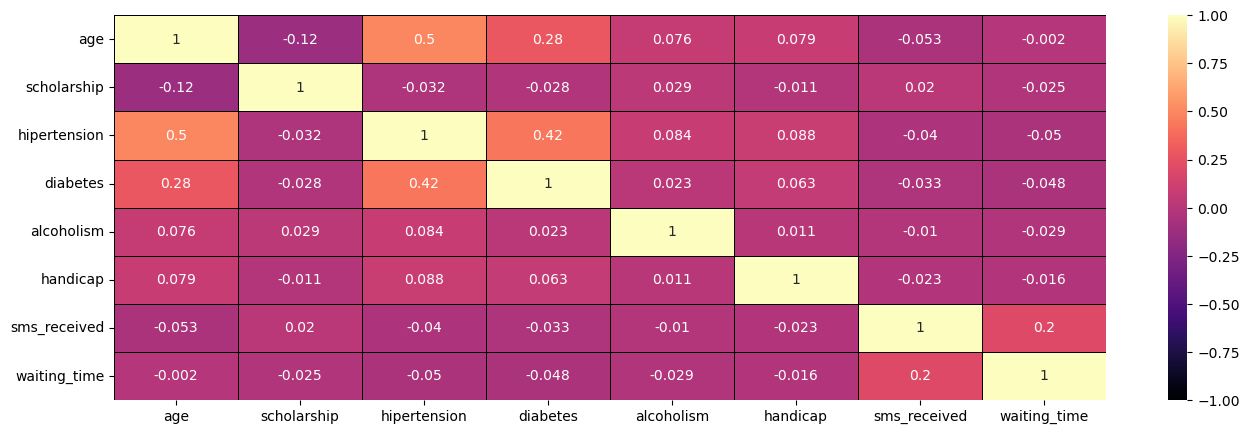

In [39]:
# Plot correlation
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black')

<a id='conclusions'></a>
## Conclusions

> After analyzing that data, I found that there is no relationship or correlation between the elements and the non-attendance, and the drawing shows the low correlation between all the elements and the non-attendance.

> The time difference between the date of registration and the date of attendance does not affect attendance

> Most of the patients attend, and the majority of them are women

# Limitations
> Unique Patients are 62,299 out of 110,527

> Appointment days are set between 29/04/2016 and 28/06/2016

> Data is collected from 81 Neighbourhoods

> The effect of location (neighbourhood) on medical appointment atteandance was not examined.

# Reference
> Pandas docs

> Stack overfolw on how to understand the heatmap


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

> relation between hipertension and no show